In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
print("tensorflow version {}".format(tf.VERSION))

tensorflow version 1.12.0


In [2]:
#building the graph (the actual computation does not happen here, though its tempting to think of that)
#build the engine
g0=tf.Graph()
with g0.as_default():
    a = tf.constant([[1,2]], dtype=tf.float32,name='a_constant')
    b = tf.constant([[2,3]], dtype=tf.float32,name='b_constant')
    c=tf.add(a,b,name='add')  # c = a + b
    d=tf.multiply(c,a,name='multiply') #d = c * a
print(a)
print(b)
print(c)
print(d)

Tensor("a_constant:0", shape=(1, 2), dtype=float32)
Tensor("b_constant:0", shape=(1, 2), dtype=float32)
Tensor("add:0", shape=(1, 2), dtype=float32)
Tensor("multiply:0", shape=(1, 2), dtype=float32)


In [3]:
#computation occurs
#start the engine
sess0=tf.Session(graph=g0)
result=sess0.run([a,c,d])
print(result)

#visualize the graph
writer = tf.summary.FileWriter('.',sess0.graph)
writer.flush()

sess0.close()

[array([[1., 2.]], dtype=float32), array([[3., 5.]], dtype=float32), array([[ 3., 10.]], dtype=float32)]


In [4]:
!pwd

/Users/haobei/Projects/Tutorial


In [5]:
#tensor math matrix
#with "defaultGraph".as_default():
g1=tf.Graph()
a0 = tf.constant(2)
with g1.as_default():
    a = tf.random_normal([2,3], dtype=tf.float32,name='a_random')
    b = tf.constant([[1,1],[1,1],[1,1]], dtype=tf.float32,name='b')
    op = tf.print("value of a",a,name='print')
    var_x = tf.get_variable("var_x", [2,2], dtype=tf.float32, trainable=False,
                            initializer=tf.zeros_initializer)
    c = tf.matmul(a,b,name='matmul') # a @ b
    d = c + var_x #tf.add
print(a0,a0.graph)
print(a,a.graph)
print(b,b.graph)
print(op,op.graph)
print(var_x,var_x.graph)
print(c,c.graph)
print(d,d.graph)

Tensor("Const:0", shape=(), dtype=int32) <tensorflow.python.framework.ops.Graph object at 0xb33d51390>
Tensor("a_random:0", shape=(2, 3), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb33dde438>
Tensor("b:0", shape=(3, 2), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb33dde438>
name: "print"
op: "PrintV2"
input: "print_format"
attr {
  key: "output_stream"
  value {
    s: "stderr"
  }
}
<tf.Variable 'var_x:0' shape=(2, 2) dtype=float32_ref> <tensorflow.python.framework.ops.Graph object at 0xb33dde438>
Tensor("matmul:0", shape=(2, 2), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb33dde438>
Tensor("add:0", shape=(2, 2), dtype=float32) <tensorflow.python.framework.ops.Graph object at 0xb33dde438>


In [6]:
sess1=tf.Session(graph=g1)

In [7]:
print('print',sess1.run(op))
print('a',sess1.run(a)) #print(a.eval(session=sess))
print('matmul',sess1.run('matmul'))
print('c',sess1.run('matmul:0')) #c
print('a,c',sess1.run([a,c]))
print('initilizer',sess1.run(var_x.initializer))
# with g1.as_default():
#     sess1.run(tf.global_variables_initializer())
print('d',sess1.run(d))
print('var_x',sess1.run(var_x))
print('d',sess1.run(d))
print('assign',sess1.run(var_x.assign_add([[1,0],[1,1]])))
print('var_x,d',sess1.run([var_x,d]))

print None
a [[-1.5386331  -1.630689   -0.24598452]
 [ 0.7991501   1.3722426  -0.6859985 ]]
matmul None
c [[ 0.7019383   0.7019383 ]
 [-0.31283498 -0.31283498]]
a,c [array([[ 1.4628478 , -1.0939809 ,  1.9056311 ],
       [ 1.8410873 ,  0.28410003, -1.2045945 ]], dtype=float32), array([[2.274498 , 2.274498 ],
       [0.9205929, 0.9205929]], dtype=float32)]
initilizer None
d [[-1.1713412  -1.1713412 ]
 [ 0.39389104  0.39389104]]
var_x [[0. 0.]
 [0. 0.]]
d [[ 2.961854   2.961854 ]
 [-1.9572444 -1.9572444]]
assign [[1. 0.]
 [1. 1.]]
var_x,d [array([[1., 0.],
       [1., 1.]], dtype=float32), array([[-0.08379221, -1.0837922 ],
       [ 0.57788765,  0.57788765]], dtype=float32)]


In [8]:
writer = tf.summary.FileWriter('.',sess1.graph)
writer.flush()

In [9]:
with g1.as_default():
    print(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)) 
    print(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))

[<tf.Variable 'var_x:0' shape=(2, 2) dtype=float32_ref>]
[]


In [10]:
sess1.close()

In [2]:
# one-dimension linear regression
x = np.array([[1], [2], [3], [4]],dtype=np.float32)
y = np.array([[4], [3], [2], [1]],dtype=np.float32)

In [3]:
# build default graph
tf.reset_default_graph()
# mini-batch 
x_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="x_placeholder")
y_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="y_placeholder")

W = tf.get_variable("weight",shape=(1,),dtype=tf.float32,
                    initializer=tf.ones_initializer,
                    trainable=True)
b = tf.get_variable("bias",shape=(1,),dtype=tf.float32,
                    initializer=tf.zeros_initializer,
                    trainable=True)
y_hat = W * x_p + b
loss = tf.reduce_mean(tf.square(y_hat - y_p))

In [4]:
sess=tf.Session() # session of the default graph
#print the design blue print of the engine
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()

In [5]:
#gradient = tf.gradients(loss,[W,b])
gradient = tf.gradients(loss,tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))
#print the design blue print of the engine
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()

In [15]:
sess.run(tf.global_variables_initializer())
W_init = sess.run([W,b])
print(W_init)
prediction = sess.run([y_hat,loss,gradient],feed_dict={x_p: x,y_p: y})
print(prediction)
for i in range(100):
    grad=sess.run(gradient,feed_dict={x_p: x,y_p: y})
    W_old,b_old = sess.run([W,b])
#     sess.run([W.assign_sub(0.1*grad[0]),b.assign_sub(0.1*grad[1])])
    sess.run([var.assign_sub(0.1*gradient) for var,gradient in zip(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES),grad)])
    W_new,b_new = sess.run([W,b])
    print(i,"gradient: ",grad, "\t", W_old,b_old, "==>",W_new,b_new)
print(sess.run([W,b]))

[array([1.], dtype=float32), array([0.], dtype=float32)]
[array([[1.],
       [2.],
       [3.],
       [4.]], dtype=float32), 5.0, [array([5.], dtype=float32), array([0.], dtype=float32)]]
0 gradient:  [array([5.], dtype=float32), array([0.], dtype=float32)] 	 [1.] [0.] ==> [0.5] [0.]
1 gradient:  [array([-2.5], dtype=float32), array([-2.5], dtype=float32)] 	 [0.5] [0.] ==> [0.75] [0.25]
2 gradient:  [array([2.5], dtype=float32), array([-0.75], dtype=float32)] 	 [0.75] [0.25] ==> [0.5] [0.325]
3 gradient:  [array([-0.87499976], dtype=float32), array([-1.8499999], dtype=float32)] 	 [0.5] [0.325] ==> [0.5875] [0.51]
4 gradient:  [array([1.3624997], dtype=float32), array([-1.0425001], dtype=float32)] 	 [0.5875] [0.51] ==> [0.45125002] [0.61425]
5 gradient:  [array([-0.15999997], dtype=float32), array([-1.51525], dtype=float32)] 	 [0.45125002] [0.61425] ==> [0.46725002] [0.765775]
6 gradient:  [array([0.8376255], dtype=float32), array([-1.1321998], dtype=float32)] 	 [0.46725002] [0.765775

58 gradient:  [array([0.08893061], dtype=float32), array([-0.2614609], dtype=float32)] 	 [-0.7029668] [4.1266866] ==> [-0.7118599] [4.1528325]
59 gradient:  [array([0.08626425], dtype=float32), array([-0.25363445], dtype=float32)] 	 [-0.7118599] [4.1528325] ==> [-0.7204863] [4.178196]
60 gradient:  [array([0.0836854], dtype=float32), array([-0.24603951], dtype=float32)] 	 [-0.7204863] [4.178196] ==> [-0.72885484] [4.2028]
61 gradient:  [array([0.0811764], dtype=float32), array([-0.23867464], dtype=float32)] 	 [-0.72885484] [4.2028] ==> [-0.73697245] [4.2266674]
62 gradient:  [array([0.07875013], dtype=float32), array([-0.23152745], dtype=float32)] 	 [-0.73697245] [4.2266674] ==> [-0.7448475] [4.24982]
63 gradient:  [array([0.07638896], dtype=float32), array([-0.22459698], dtype=float32)] 	 [-0.7448475] [4.24982] ==> [-0.75248635] [4.2722797]
64 gradient:  [array([0.07410336], dtype=float32), array([-0.21787226], dtype=float32)] 	 [-0.75248635] [4.2722797] ==> [-0.7598967] [4.294067]
65

In [16]:
prediction = sess.run([y_hat,loss,gradient],feed_dict={x_p: x,y_p: y})
print("prediction")
print(prediction[0])
print("target")
print(y)
# 1000 steps

prediction
[[3.8392346]
 [2.9220982]
 [2.004962 ]
 [1.0878255]]
target
[[4.]
 [3.]
 [2.]
 [1.]]


In [17]:
sess.close()

In [18]:
# single sigmoid neuron prediction on two-dimension data
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[0],[1],[1]])
#tf.sigmoid() tf.reduce_mean()

In [19]:
tf.reset_default_graph()

x_p = tf.placeholder(dtype=tf.float32,shape=(None,2),name="x_placeholder")
y_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="y_placeholder")

W = tf.get_variable("weight",shape=(2,),dtype=tf.float32,
                    initializer=tf.random_normal_initializer,
                    trainable=True)
b = tf.get_variable("bias",shape=(1,),dtype=tf.float32,
                    initializer=tf.random_normal_initializer,
                    trainable=True)
y_hat = tf.sigmoid(tf.reduce_sum(x_p*W,1)+b)
loss = tf.reduce_mean(tf.square(y_hat - y_p))
gradient = tf.gradients(loss,tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))

In [20]:
sess=tf.Session()
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()

In [21]:
sess.run(tf.global_variables_initializer())
print(prediction)
for i in range(100):
    grad=sess.run(gradient,feed_dict={x_p: x,y_p: y})
    W_old,b_old = sess.run([W,b])
    sess.run([var.assign_sub(0.1*gradient) for var,gradient in zip(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES),grad)])
    W_new,b_new = sess.run([W,b])
    print(i,"gradient: ",grad[0], "\t", W_old,b_old, "==>",W_new,b_new)
sess.run([W,b])

[array([[3.8392346],
       [2.9220982],
       [2.004962 ],
       [1.0878255]], dtype=float32), 0.009913039, [array([0.02480948], dtype=float32), array([-0.07293987], dtype=float32)]]
0 gradient:  [0.0427327  0.02848105] 	 [ 1.535961  -0.2172551] [0.4177605] ==> [ 1.5316877 -0.2201032] [0.41163668]
1 gradient:  [0.04292906 0.02830977] 	 [ 1.5316877 -0.2201032] [0.41163668] ==> [ 1.5273948  -0.22293419] [0.40553623]
2 gradient:  [0.04312241 0.0281365 ] 	 [ 1.5273948  -0.22293419] [0.40553623] ==> [ 1.5230825  -0.22574784] [0.39945948]
3 gradient:  [0.04331265 0.02796123] 	 [ 1.5230825  -0.22574784] [0.39945948] ==> [ 1.5187513  -0.22854397] [0.3934067]
4 gradient:  [0.04349969 0.02778399] 	 [ 1.5187513  -0.22854397] [0.3934067] ==> [ 1.5144013  -0.23132236] [0.38737816]
5 gradient:  [0.04368345 0.02760477] 	 [ 1.5144013  -0.23132236] [0.38737816] ==> [ 1.510033   -0.23408283] [0.38137418]
6 gradient:  [0.04386383 0.02742359] 	 [ 1.510033   -0.23408283] [0.38137418] ==> [ 1.5056466 -0.

71 gradient:  [0.04567529 0.01227619] 	 [ 1.2078437  -0.36677164] [0.05702902] ==> [ 1.2032762  -0.36799926] [0.05322108]
72 gradient:  [0.04554659 0.01201666] 	 [ 1.2032762  -0.36799926] [0.05322108] ==> [ 1.1987215  -0.36920092] [0.04945213]
73 gradient:  [0.04541422 0.01175746] 	 [ 1.1987215  -0.36920092] [0.04945213] ==> [ 1.1941801  -0.37037665] [0.04572219]
74 gradient:  [0.04527829 0.01149868] 	 [ 1.1941801  -0.37037665] [0.04572219] ==> [ 1.1896523 -0.3715265] [0.04203126]
75 gradient:  [0.04513887 0.01124036] 	 [ 1.1896523 -0.3715265] [0.04203126] ==> [ 1.1851385  -0.37265053] [0.03837935]
76 gradient:  [0.04499607 0.01098255] 	 [ 1.1851385  -0.37265053] [0.03837935] ==> [ 1.1806389  -0.37374878] [0.03476647]
77 gradient:  [0.04484998 0.01072533] 	 [ 1.1806389  -0.37374878] [0.03476647] ==> [ 1.1761539 -0.3748213] [0.03119258]
78 gradient:  [0.04470068 0.01046874] 	 [ 1.1761539 -0.3748213] [0.03119258] ==> [ 1.1716838  -0.37586817] [0.02765768]
79 gradient:  [0.0445483  0.0102

[array([ 1.0817243, -0.3920967], dtype=float32),
 array([-0.03769532], dtype=float32)]

(10000,)


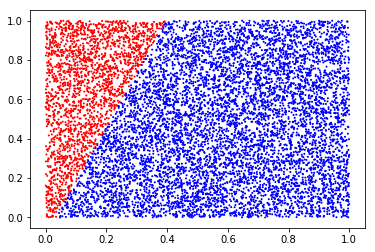

In [22]:
vis_inputs = np.random.uniform(size=(10000,2))
predictions = sess.run(y_hat,feed_dict={x_p:vis_inputs})
print(predictions.shape)
colors = list(map(lambda p: 'red' if p < 0.5 else 'blue', predictions))
plt.scatter(vis_inputs[:,0], vis_inputs[:,1], 1, colors)

In [23]:
print(sess.run(y_hat,feed_dict={x_p:x}))

[0.49057725 0.73962665 0.394176   0.6574457 ]


In [24]:
sess.close()

In [59]:
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])
#not linear separable

In [79]:
tf.reset_default_graph()

x_p = tf.placeholder(dtype=tf.float32,shape=(None,2),name="x_placeholder")
y_p = tf.placeholder(dtype=tf.float32,shape=(None,1),name="y_placeholder")

W = tf.get_variable("weight",shape=(2,),dtype=tf.float32,
                    initializer=tf.random_normal_initializer,
                    trainable=True)
# L = tf.get_variable("linear_transform",shape=(2,2),dtype=tf.float32,
#                     initializer=tf.random_normal_initializer,
#                     trainable=True)
L = tf.constant([[1,-1],[-1,1]],dtype=tf.float32) # benifit of keeping track of trainable variables
b = tf.get_variable("bias",shape=(1,),dtype=tf.float32,
                    initializer=tf.zeros_initializer,
                    trainable=True)

In [80]:
y_hat = tf.sigmoid(tf.reduce_sum(tf.square(x_p @ L)*W,1)+b)
loss = tf.reduce_mean(tf.square(y_hat - y_p))
gradient = tf.gradients(loss,tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES))

In [108]:
sess=tf.Session()
writer = tf.summary.FileWriter('.',sess.graph)
writer.flush()

In [111]:
sess.run(tf.global_variables_initializer())
for i in range(100):
    grad=sess.run(gradient,feed_dict={x_p: x,y_p: y})
    sess.run([var.assign_sub(0.1*gradient) for var,gradient in zip(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES),grad)])
    print("{} {}".format(i,grad))
# print(sess.run([W,L,b]))
print(sess.run([W,b]))

0 [array([0.02359656, 0.02359656], dtype=float32), array([0.04719312], dtype=float32)]
1 [array([0.02356037, 0.02356037], dtype=float32), array([0.04682579], dtype=float32)]
2 [array([0.02352296, 0.02352296], dtype=float32), array([0.04645831], dtype=float32)]
3 [array([0.02348433, 0.02348433], dtype=float32), array([0.04609075], dtype=float32)]
4 [array([0.02344452, 0.02344452], dtype=float32), array([0.04572313], dtype=float32)]
5 [array([0.02340353, 0.02340353], dtype=float32), array([0.04535552], dtype=float32)]
6 [array([0.0233614, 0.0233614], dtype=float32), array([0.04498795], dtype=float32)]
7 [array([0.02331813, 0.02331813], dtype=float32), array([0.04462047], dtype=float32)]
8 [array([0.02327374, 0.02327374], dtype=float32), array([0.04425317], dtype=float32)]
9 [array([0.02322827, 0.02322827], dtype=float32), array([0.04388605], dtype=float32)]
10 [array([0.02318172, 0.02318172], dtype=float32), array([0.04351919], dtype=float32)]
11 [array([0.02313412, 0.02313412], dtype=fl

97 [array([0.01725581, 0.01725581], dtype=float32), array([0.01639276], dtype=float32)]
98 [array([0.01718672, 0.01718672], dtype=float32), array([0.01616102], dtype=float32)]
99 [array([0.01711792, 0.01711792], dtype=float32), array([0.01593131], dtype=float32)]
[array([1.5008105 , 0.34292823], dtype=float32), array([-0.30346018], dtype=float32)]


(10000,)


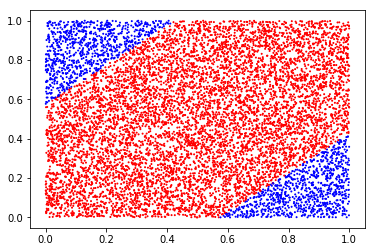

In [112]:
vis_inputs = np.random.uniform(size=(10000,2))
predictions = sess.run(y_hat,feed_dict={x_p:vis_inputs})
print(predictions.shape)
colors = list(map(lambda p: 'red' if p < 0.5 else 'blue', predictions))
plt.scatter(vis_inputs[:,0], vis_inputs[:,1], 1, colors)

In [107]:
sess.close()

# Summary
## 1. What is tensorflow?
## 2. Why do people use tensorflow?
## 3. How to write tensorflow program?
### (1). Build dataflow graph
### (2). Run dataflow graph and train the weights
## 4. (Bonus) What is feature learning and feature crafting (feature engineering), Difference, how to do feature crafting?

## 1. 

## 2.

## 3.(1). 

## 3.(2).

## 4.